In [50]:
############################## IMPORTS ##############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Organisation des données

In [51]:
#convertir le csv en pandas dataframe
dataframe = pd.read_csv('export_IA.csv', sep=',')

# Découverte des données

### Valeur cible (gravité de l’accident) pour la classification = classe

In [52]:
#compte les différents résultats pour chaque colonne
for i in range(len(dataframe.columns)):
    print("Valeur cible", i+1,  ": ", dataframe.columns[i], " - ", len(dataframe[dataframe.columns[i]].unique()))

Valeur cible 1 :  id_code_insee  -  8259
Valeur cible 2 :  Num_Acc  -  40250
Valeur cible 3 :  num_veh  -  58
Valeur cible 4 :  id_usa  -  73643
Valeur cible 5 :  date  -  29950
Valeur cible 6 :  ville  -  8078
Valeur cible 7 :  latitude.x  -  1253
Valeur cible 8 :  longitude.x  -  1495
Valeur cible 9 :  descr_cat_veh  -  24
Valeur cible 10 :  descr_agglo  -  2
Valeur cible 11 :  descr_athmo  -  9
Valeur cible 12 :  descr_lum  -  5
Valeur cible 13 :  descr_etat_surf  -  9
Valeur cible 14 :  description_intersection  -  9
Valeur cible 15 :  an_nais  -  101
Valeur cible 16 :  age  -  101
Valeur cible 17 :  place  -  10
Valeur cible 18 :  descr_dispo_secu  -  15
Valeur cible 19 :  descr_grav  -  4
Valeur cible 20 :  descr_motif_traj  -  6
Valeur cible 21 :  descr_type_col  -  7
Valeur cible 22 :  department_name  -  89
Valeur cible 23 :  department_number  -  90
Valeur cible 24 :  region_name  -  17


### Nombre d'instances

In [53]:
#compte le nombre d'instances et renvoie juste le nombre
print("Nombre d'instances : ", len(dataframe.index))

Nombre d'instances :  73643


### Nombre d'instances par classe

<AxesSubplot:xlabel='descr_grav'>

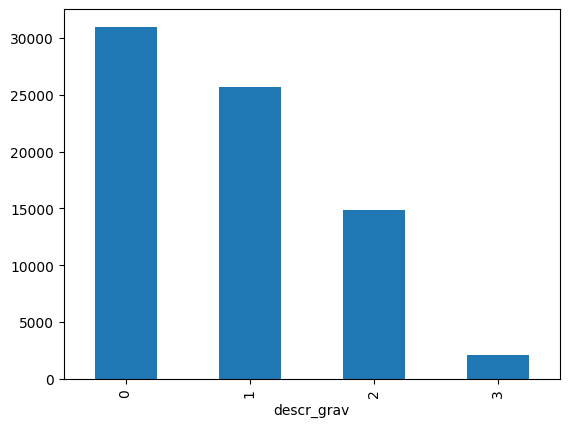

In [54]:

#creer un tableau qui affiche les données selon les descr_grav
graphique1 = dataframe.groupby('descr_grav').size()
#représenter en graphique 
graphique1.plot.bar()

### Taille des features

In [55]:
# Taille des features
print("Taille des features : ", len(dataframe.columns)-1)

Taille des features :  23


# Préparation des données

In [57]:
# préparation des données, conversions des dates et des heures en entier sans les séparateurs
dataframe['date'] = pd.to_datetime(dataframe['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y%m%d%H%M%S').astype(int)

print(dataframe.head())

  id_code_insee       Num_Acc num_veh  id_usa            date  \
0         10100  200900035904     A01  823507  20090803130000   
1         10100  200900004313     A01  752937  20090227223000   
2         10102  200900005197     A01  754945  20090113160000   
3         10102  200900005197     B02  754947  20090113160000   
4         10102  200900005206     A01  754970  20090209201500   

              ville  latitude.x  longitude.x  descr_cat_veh  descr_agglo  ...  \
0            CLEREY     48.2000          4.2              2            1  ...   
1            CLEREY     48.2000          4.2              3            2  ...   
2  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
3  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
4  COLOMBE LA FOSSE     48.2667          4.8              6            2  ...   

   an_nais   age  place                         descr_dispo_secu  descr_grav  \
0   1952.0  57.0    1.0  Utilisation d'une